In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
#Utilize Advertising dataset from ISLR
df = pd.read_csv('advertising.csv')

In [3]:
df.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [4]:
#look at first 5 entries
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


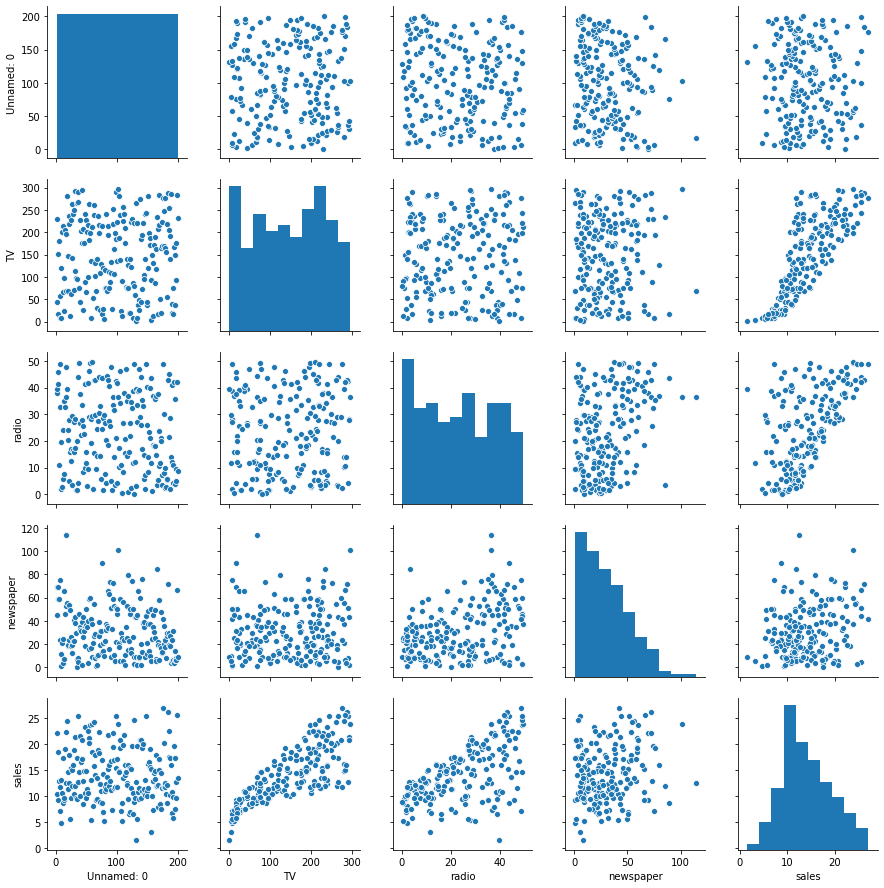

In [5]:
plot = sns.pairplot(df)
print(plot)

In [6]:
#import the stats model
import statsmodels.formula.api as smf

In [7]:
# Initialise and fit linear regression model using `statsmodels`
model = smf.ols('sales ~ TV', data=df)
model = model.fit()

In [8]:
#Establish a prediction for sales based on TV model
sales_pred = model.predict()

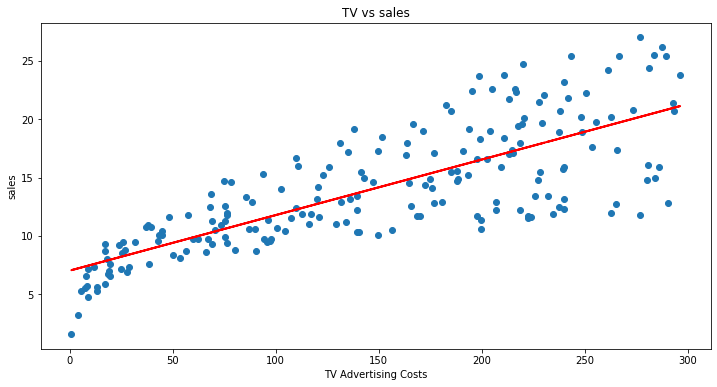

In [9]:
# Plot regression against actual data this is a simple linear 1 line regression
plt.figure(figsize=(12, 6))
plt.plot(df['TV'], df['sales'], 'o')           # scatter plot showing actual data
plt.plot(df['TV'], sales_pred, 'r', linewidth=2)   # regression line
plt.xlabel('TV Advertising Costs')
plt.ylabel('sales')
plt.title('TV vs sales')

plt.show()


In [10]:
#by utilizing our predictions we can input a number and infer our resulting #of sales based on input
#here we see spending $400 will put us at 26 units sold.
new_X = 400
model.predict({"TV": new_X})

0    26.04725
dtype: float64

In [24]:
#here we will import the linear regression model from Sklearn
from sklearn.linear_model import LinearRegression

#Now lets build a model using our advertising data set - using variables TV and Radio
predictors = ['TV','radio']

#Lets split the data in to predictors X and utilize Y as output
x = df[predictors]
y = df['sales']

#initialise and then fit the model
lm = LinearRegression()
model = lm.fit(x,y)

In [27]:
#get alphas and betas calling intercept and coef
print(f'alpha = {model.intercept_}')
print(f'betas = {model.coef_}')

alpha = 2.921099912405138
betas = [0.04575482 0.18799423]


In [28]:
#make a prediction utilizing .predict()
model.predict(x)

array([20.55546463, 12.34536229, 12.33701773, 17.61711596, 13.22390813,
       12.51208449, 11.71821241, 12.10551553,  3.7093792 , 12.55169696,
        7.0358597 , 17.25652015, 10.60866187,  8.81095051, 18.44466773,
       20.82891539, 12.90386507, 23.24107626,  9.94121476, 14.15384619,
       18.12139161, 14.74206357,  6.51417168, 16.54402663,  8.14035215,
       15.6080206 , 14.96769383, 17.0463346 , 19.39954145,  9.15929748,
       21.64292187, 11.35791808,  7.65045928, 18.83346334,  7.56302763,
       16.99280099, 23.36720719, 15.6258994 ,  9.91257829, 20.4405801 ,
       16.37872122, 17.29870935, 21.5621537 , 13.96692266,  8.9009974 ,
       15.16263814,  8.88644967, 21.69944046, 16.28690268,  8.18162949,
       12.64569407,  9.31962792, 20.66180115, 19.96126242, 20.35512357,
       21.30864743,  8.53774783, 12.76239488, 21.89072858, 18.10746914,
        5.74497097, 22.90418658, 16.78413768, 13.18474853, 16.96570907,
        7.82652846,  8.98703456, 12.02066194, 18.95313425, 21.09

In [32]:
#now lets make a prediction utilizing input for both TV and Radio
#here we see if we bump TV spending to $300 and spend $200 on Radio
#we can expect about 54 unit sales
new_X = [[300,200]]
print(model.predict(new_X))

[54.24638977]
